In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df = pd.read_csv('/train.csv')

In [18]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [19]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [20]:
df.shape

(333, 15)

In [23]:
df.dtypes

,0
ID,int64
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


In [25]:
df.isna().sum()

,0
ID,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


In [26]:
target_feature = 'medv'
y = df[target_feature]
x = df.drop(target_feature, axis=1)

In [27]:
x.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43


In [28]:
y.head()

,medv
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9


In [30]:
from sklearn.model_selection import train_test_split
x_train, x__test,y_tarin,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [31]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_tarin)

LinearRegression()

In [32]:
train_score=round(regression.score(x_train,y_tarin)*100,2)
print('train score of linear regression:',train_score)

train score of linear regression: 73.96


In [33]:
y_pred = regression.predict(x__test)

In [34]:
from sklearn.metrics import r2_score
score=round(r2_score(y_test,y_pred)*100,2)
print("r_2 score", score)

r_2 score 70.01


In [35]:
round(regression.score(x__test,y_test)*100,2)

70.01

In [36]:
from sklearn import metrics
print("mean absolute error on TEST DATA of Linear regression:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error on TEST DATA of Linear regression:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error on TEST DATA of Linear regression:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error on TEST DATA of Linear regression: 3.736273922640628
mean squared error on TEST DATA of Linear regression: 29.439220022863665
root mean squared error on TEST DATA of Linear regression: 5.425792110177431


In [37]:
df1=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df1.head()

,Actual,Predicted
304,19.9,17.935055
243,50.0,26.179960
65,20.6,27.340377
73,19.8,22.670944
327,18.3,17.697139


In [38]:
df.head(20)
df=df.drop(['ID'],axis=1)

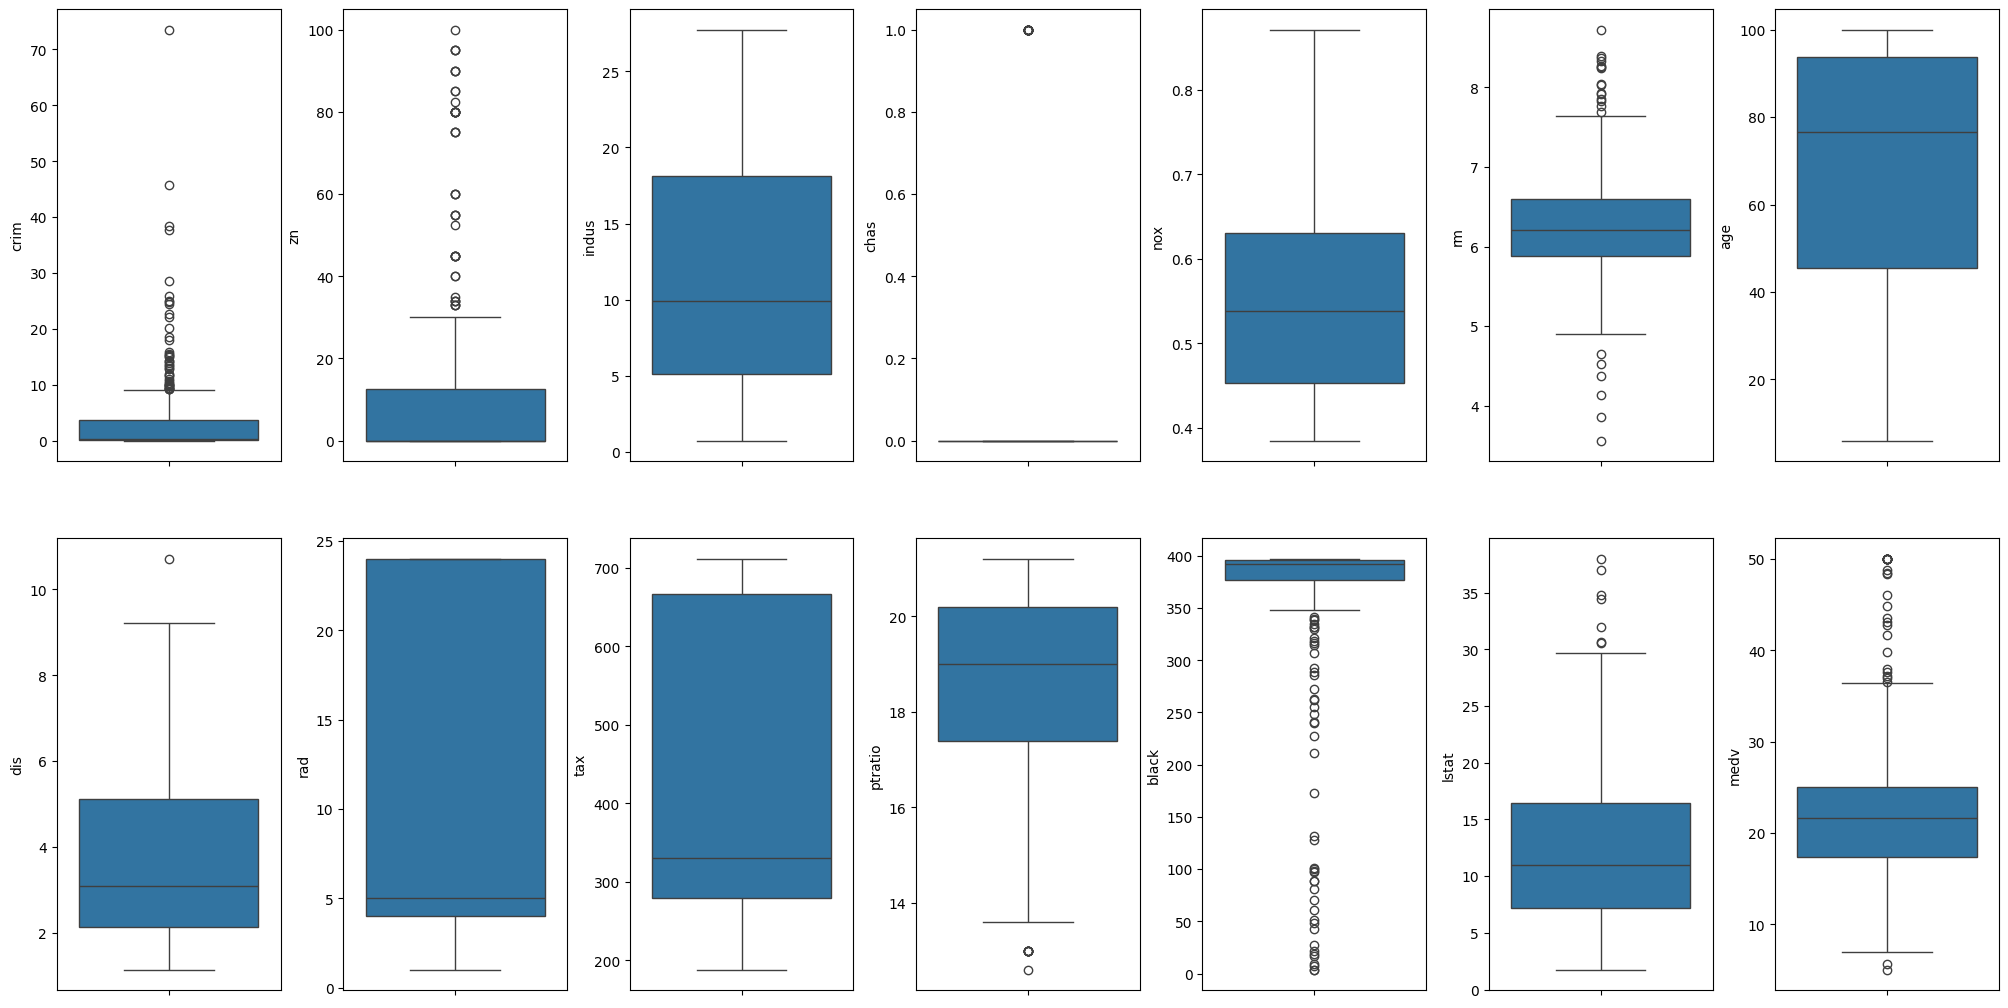

In [39]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [40]:
regression.intercept_

35.90982906044271

In [41]:
regression.coef_

array([-4.06368873e-03,  2.19628340e-02,  6.43258604e-02,  5.67841729e-02,
        5.05973586e+00, -1.46010605e+01,  3.35822601e+00, -1.19504803e-03,
       -1.57904962e+00,  2.97187715e-01, -1.04872057e-02, -8.25448987e-01,
        1.06659098e-02, -6.43706933e-01])

In [45]:
lr_coefficient = pd.DataFrame()
lr_coefficient["columns"] = x_train.columns
lr_coefficient["coefficient Estimte"] = pd.Series(regression.coef_)

print(lr_coefficient)

    columns  coefficient Estimte
0        ID            -0.004064
1      crim             0.021963
2        zn             0.064326
3     indus             0.056784
4      chas             5.059736
5       nox           -14.601060
6        rm             3.358226
7       age            -0.001195
8       dis            -1.579050
9       rad             0.297188
10      tax            -0.010487
11  ptratio            -0.825449
12    black             0.010666
13    lstat            -0.643707


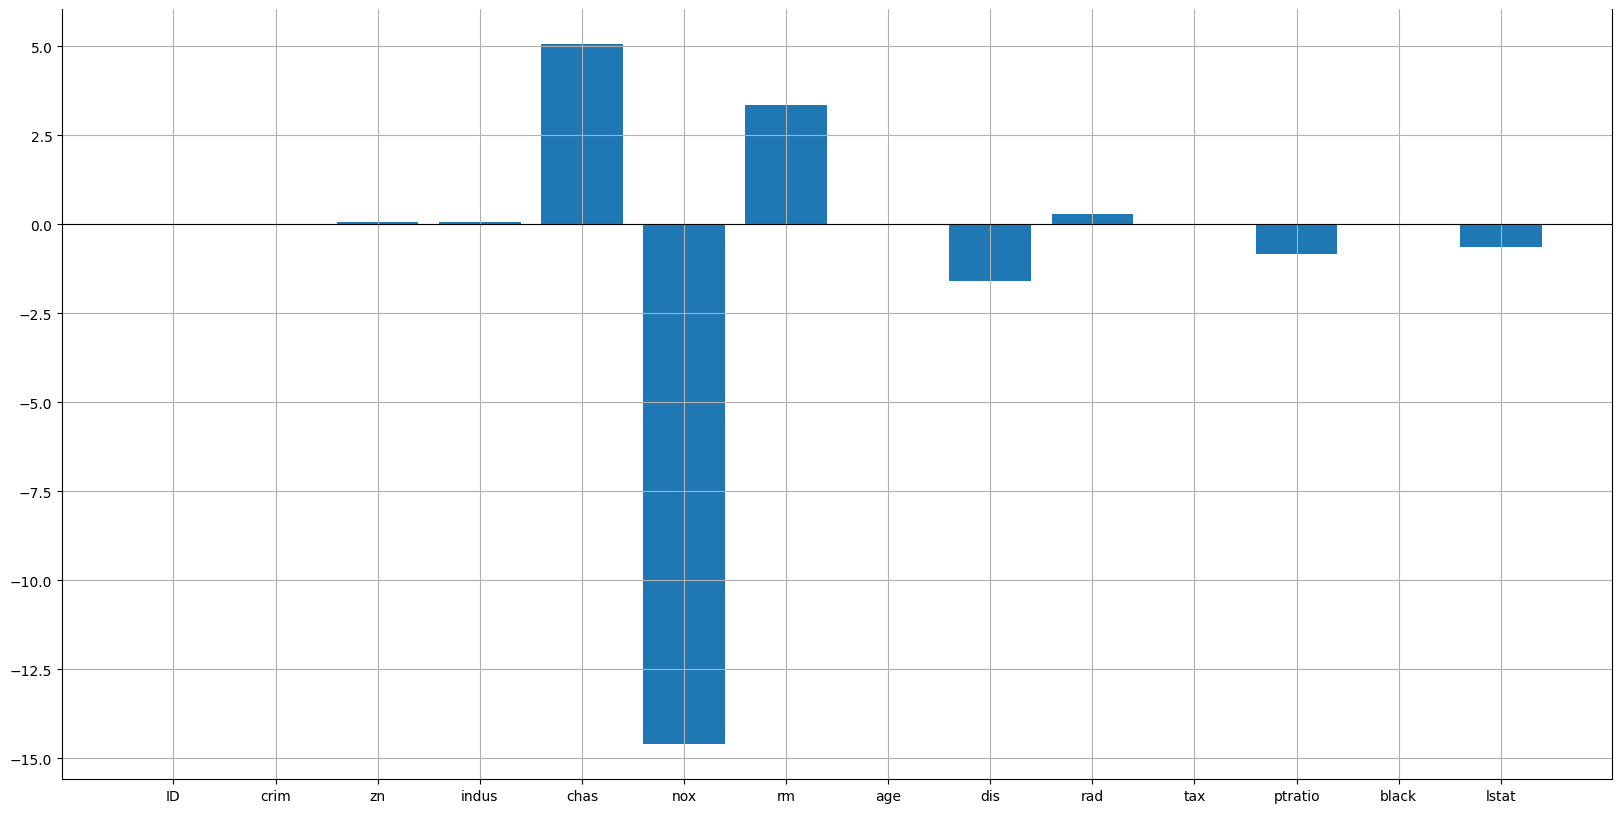

In [48]:
fig, ax = plt.subplots(figsize =(20,10))
ax.bar(lr_coefficient["columns"], lr_coefficient["coefficient Estimte"])
ax.spines['top'].set_position('zero')
plt.style.use('ggplot')

plt.grid()
plt.show()

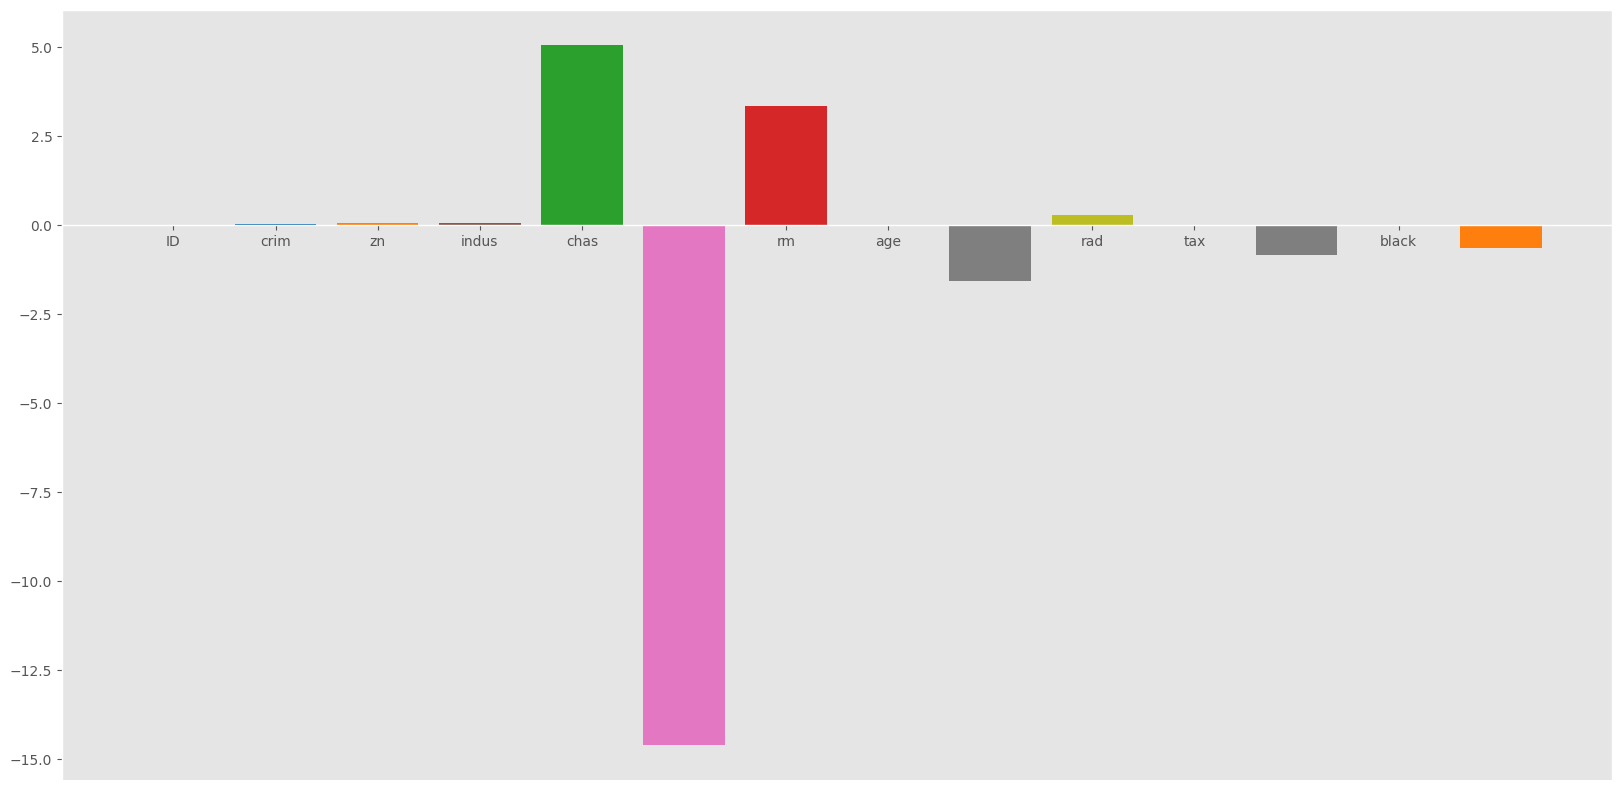

In [60]:
fig, ax = plt.subplots(figsize =(20,10))
color = ['tab:gray', 'tab:blue', 'tab:orange','tab:brown', 'tab:green', 'tab:pink','tab:red',
         'tab:purple', 'tab:gray','tab:olive', 'tab:cyan']
ax.bar(lr_coefficient["columns"],
       lr_coefficient['coefficient Estimte'], color=color)
ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')

plt.grid()
plt.show()

In [61]:
import pickle
filename = 'linear model.pkl'
pickle.dump(regression, open(filename, 'wb'))

In [62]:
import pickle
loaded_model = pickle.load(open(filename, 'rb'))
a = loaded_model.predict([[7,0.08829, 12.5, 7.87, 8,0.524, 6.012, 66.6, 5.5605, 5,311, 15.2, 395.60, 12.43]])

print("predicted value will be: \n",a)

predicted value will be: 
 [63.18672712]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [64]:
df1=pd.DataFrame({'Actual':y_test, 'predicted':y_pred, 'Variance':y_test-y_pred})
df1.head()

,Actual,predicted,Variance
304,19.9,17.935055,1.964945
243,50.0,26.179960,23.820040
65,20.6,27.340377,-6.740377
73,19.8,22.670944,-2.870944
327,18.3,17.697139,0.602861


In [66]:
df1=pd.DataFrame({'Actual':y_test, 'predicted':y_pred, 'Variance':y_test-y_pred})
df1.head()

,Actual,predicted,Variance
304,19.9,17.935055,1.964945
243,50.0,26.179960,23.820040
65,20.6,27.340377,-6.740377
73,19.8,22.670944,-2.870944
327,18.3,17.697139,0.602861


In [72]:
x__test.shape

(67, 14)

In [73]:
len(x__test)

67

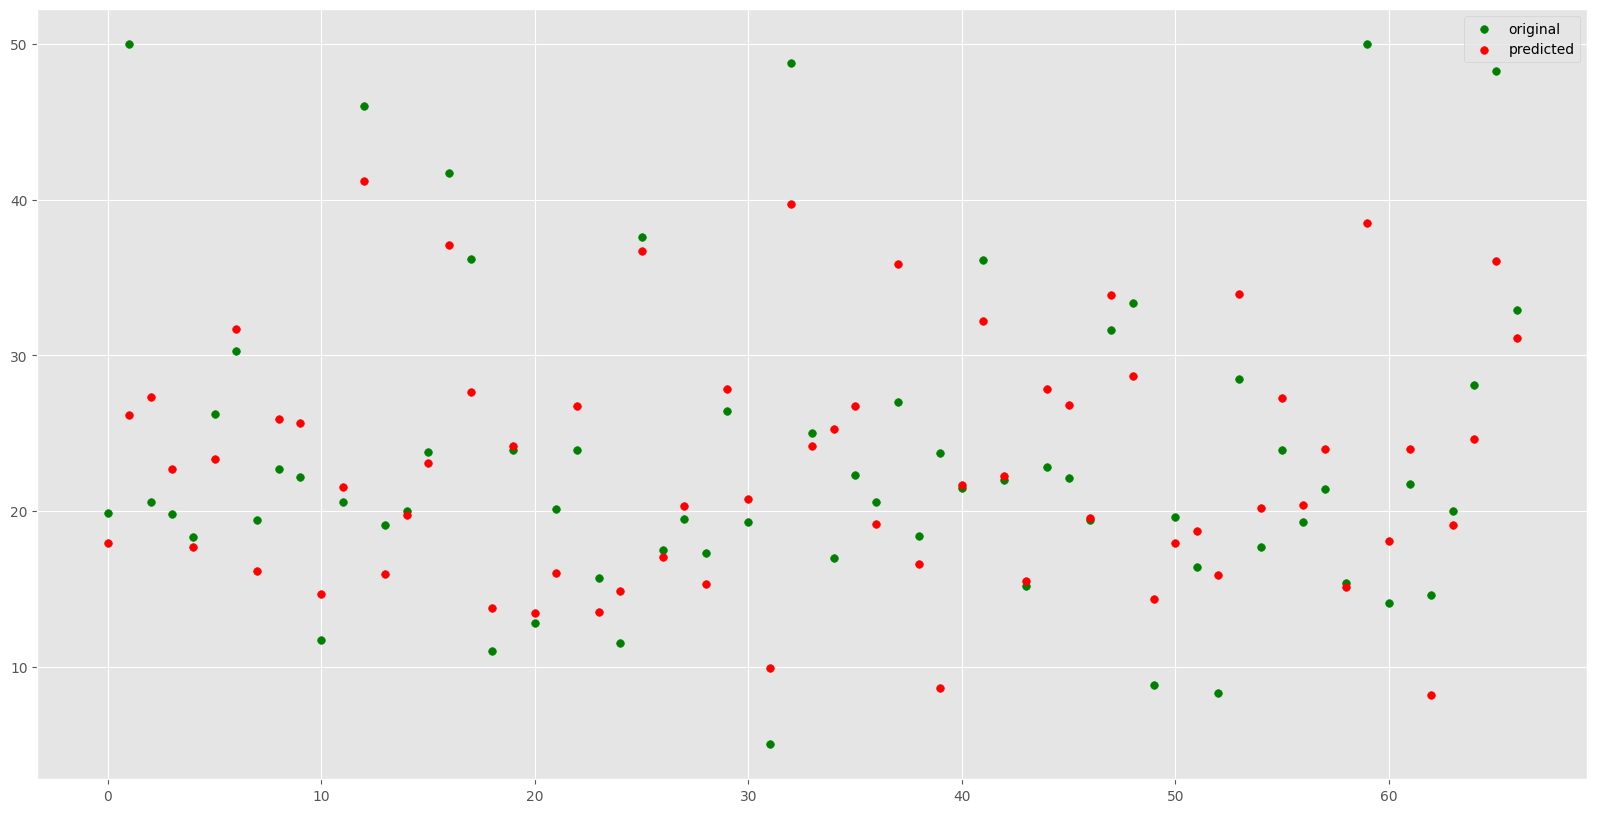

In [74]:
fig, ax = plt.subplots(figsize =(20, 10))
x_ax = range(len(x__test))

plt.scatter(x_ax, y_test, s=30, color="green", label="original")
plt.scatter(x_ax, y_pred, s=30, color="red", label="predicted")
plt.legend()
plt.show()

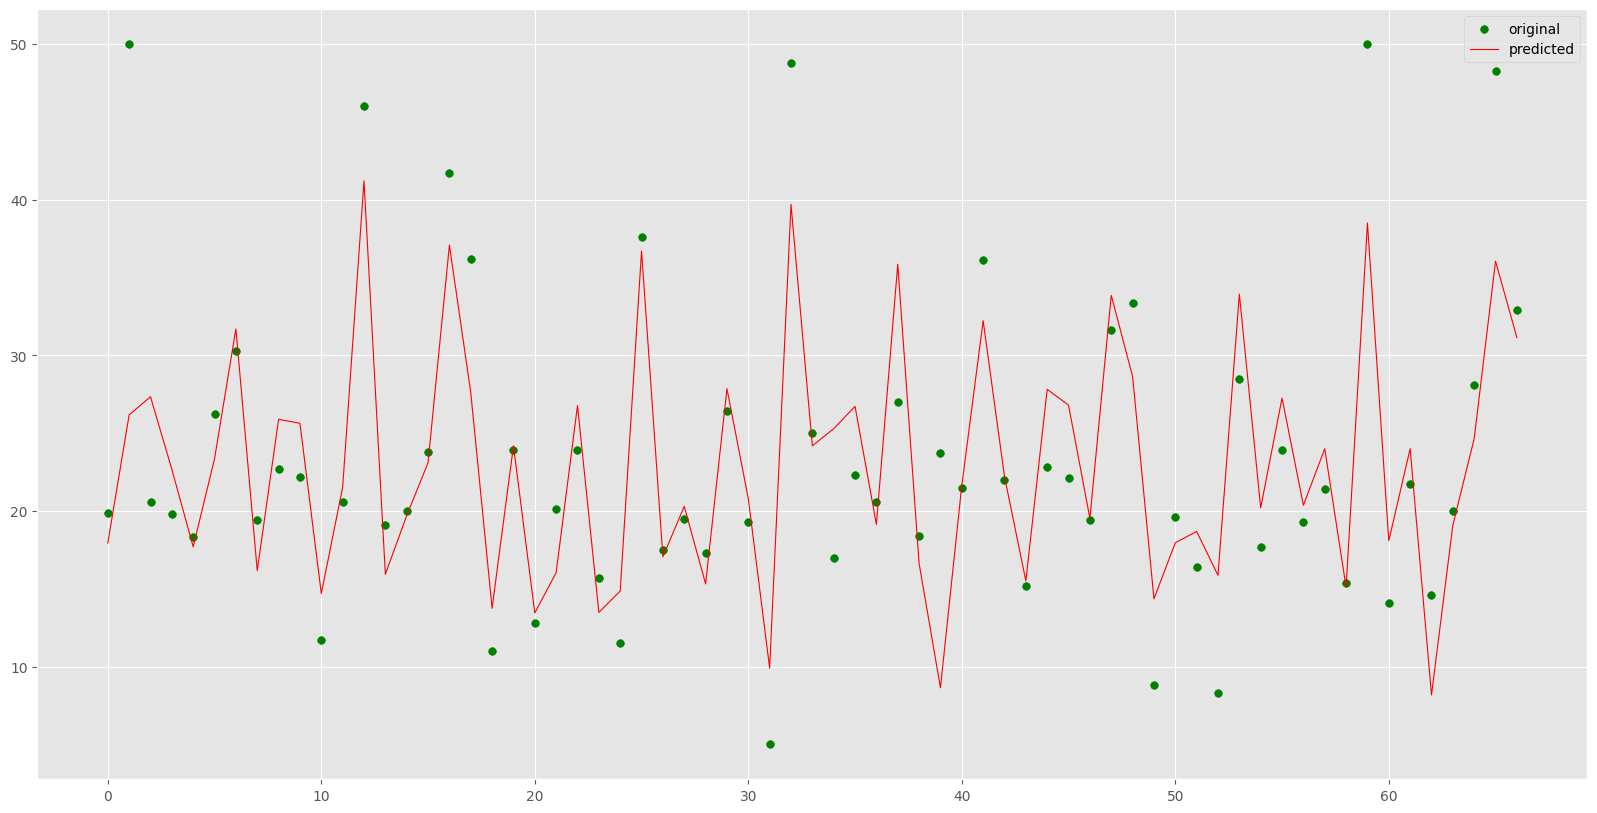

In [78]:
fig, ax = plt.subplots (figsize =(20, 10))

x_ax = range(len(x__test))

plt.scatter(x_ax, y_test, s=30, color="green", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

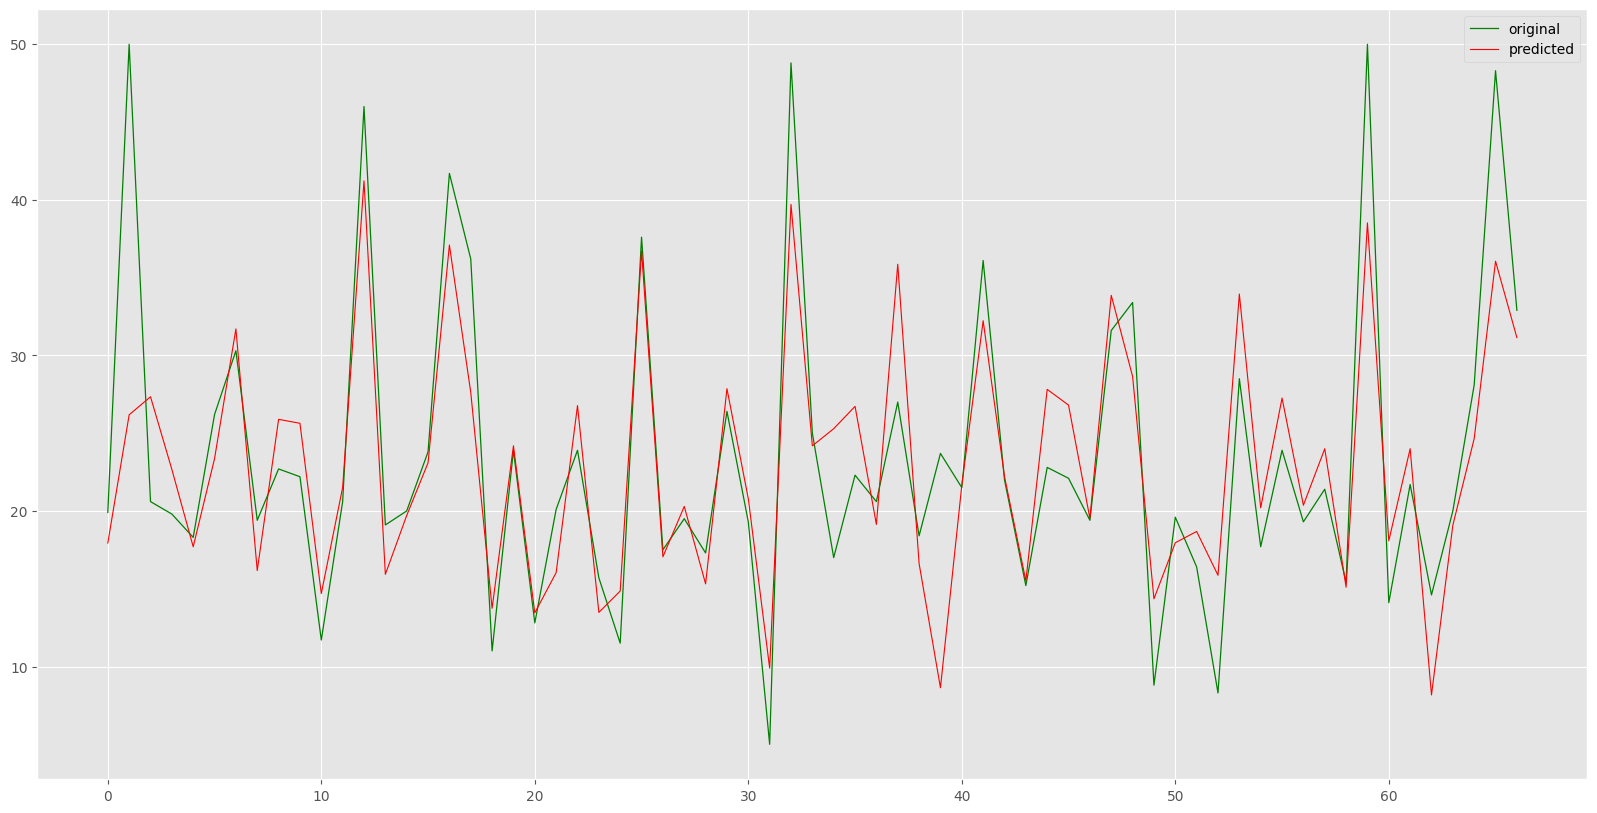

In [85]:
fig, ax = plt.subplots (figsize =(20, 10))
x_ax = range(len(x__test))
plt.plot(x_ax, y_test, lw=0.9, color="green", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()